# ***Import python Libraries & Start EDA:***

In [1]:
# from ydata_profiling import ProfileReport

# # Assuming you have a DataFrame called df:
# profile = ProfileReport(df, title="EDA Report", explorative=True)
# profile.to_notebook_iframe()

# """This only works in a virtual environment."""

In [ ]:
import os
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up logging for debug information:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Option 1: Set display options to show all rows:
pd.set_option('display.max_rows', None)

# Option 2: Set display options to show all columns:
pd.set_option('display.max_columns', None) 

# Option 3: Set the width to show all content:
pd.set_option('display.width', None)

# Option 4: Set the max column width to avoid truncating cell contents:
pd.set_option('display.max_colwidth', None)


In [4]:

def load_data(file_path):
    """
    Load dataset from CSV and return the dataframe.

    Args:
        file_path (str): Path to the CSV file.

    Returns: Pandas DataFrame
    """
    try:
        logging.info("Loading dataset...")
        df = pd.read_csv(file_path)
        logging.info("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        logging.error(f"File not found: {file_path}")
        raise
    except Exception as e:
        logging.error(f"An error occurred: {e}")
        raise

# Load your dataset - Get notebook's current directory (cwd in Jupyter):
notebook_dir = Path(os.getcwd())
file_path = notebook_dir.parent.parent / "ml" / "data" / "job_posting_data.csv"

# file_path = r"ml\data\job_posting_data.csv"
df = load_data(file_path)

# Show basic info about dataset
if df is not None:
    print("Shape of dataset:", df.shape)
    print("\nData types and non-null counts:")
    print(df.info())


INFO: Loading dataset...
INFO: Dataset loaded successfully.


Shape of dataset: (17880, 18)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   ob

In [5]:
# df.describe()

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Payp

## ***Key Observations from Data Summary:***

Missing Values - Some columns have very high missing values:

salary_range: 84% missing

department: 65% missing

required_education, benefits, and required_experience: ~40–45% missing

These may need imputation, domain-informed filling, or even dropping depending on our use case.

Data Types: 

1. Columns are correctly identified as object (i.e., text-based).

2. The fields: telecommuting, has_company_logo, has_questions, and fraudulent, appear to be binary/integer values — good candidates for ML.

| Task Needed | Y/N |
|-------------|--------|
| Handle missing values (Especially for `salary_range`, `department`, etc.) | Y |
| Text vectorization (NLP) (for columns like `description`, `requirements`, `benefits`) | Y |
| Encoding categorical features (for `employment_type`, `industry`, etc.) | Y |
| Train/test split + resampling (deal with class imbalance) | Y |


In [7]:
def inspect_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Inspect the dataset for missing values, datatypes, and number of unique values.

    Args:
        (Pandas DataFrame): DataFrame to inspect.

    Returns:
        Summary Pandas DataFrame with information per column.
    """
    try:
        summary = pd.DataFrame({
            'Data Type': df.dtypes,
            'Missing Values': df.isnull().sum(),
            'Missing %': round((df.isnull().mean() * 100), 2),
            'Unique Values': df.nunique(),
            # 'Sample Value': df.iloc[0]
        })
        summary = summary.sort_values(by='Missing %', ascending=False)
        logging.info("Data inspection completed.")
        return summary
    except Exception as e:
        logging.error(f"Error during data inspection: {e}")
        raise

# Run inspection
data_summary = inspect_data(df)

data_summary


INFO: Data inspection completed.


,Data Type,Missing Values,Missing %,Unique Values
salary_range,object,15012,83.96,874
department,object,11547,64.58,1337
required_education,object,8105,45.33,13
benefits,object,7210,40.32,6204
required_experience,object,7050,39.43,7
function,object,6455,36.10,37
industry,object,4903,27.42,131
employment_type,object,3471,19.41,5
company_profile,object,3308,18.50,1709
requirements,object,2695,15.07,11966


Drop the following Columns: salary, department, required-education, has_questions, experience, function, benefits, industry, company logo, 

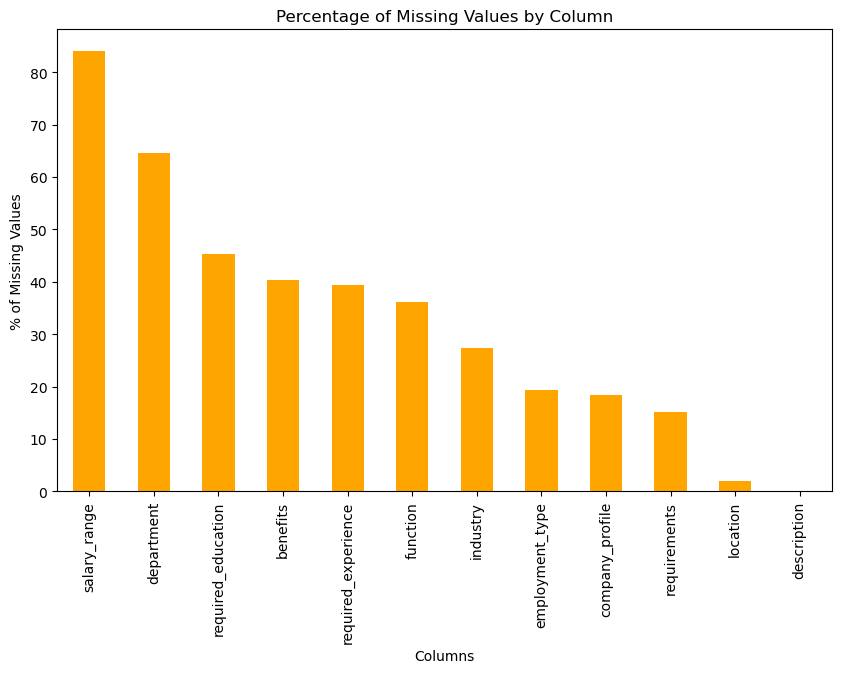

In [ ]:
# Count and display percentage of missing values:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()


## *Check for Duplicate Rows of Data:*

In [8]:

def check_duplicates(df, subset=None):
    """
    Check a DataFrame for duplicate rows and return statistics.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to check for duplicates
    subset : list, optional
        List of column names to consider for identifying duplicates.
        If None, use all columns.
        
    Returns:
    --------
    dict
        Dictionary containing:
        - 'has_duplicates': Boolean indicating if duplicates exist
        - 'duplicate_count': Number of duplicate rows
        - 'duplicate_rows': DataFrame containing only the duplicate rows
        - 'value_counts': Series showing counts for each duplicated row
    """
    # Get value counts for each unique row combination
    if subset is None:
        value_counts = df.value_counts()
    else:
        value_counts = df.value_counts(subset=subset)
    
    # Find rows with count > 1 (duplicates)
    duplicated_rows = value_counts[value_counts > 1]
    
    # Calculate total number of duplicate rows (excluding first occurrences)
    duplicate_count = sum(count - 1 for count in duplicated_rows)
    
    # Find the actual duplicate rows in the DataFrame
    if subset is None:
        mask = df.duplicated(keep=False)
    else:
        mask = df.duplicated(subset=subset, keep=False)
    
    duplicate_rows_df = df[mask].copy()
    
    # Return results as a dictionary
    result = {
        'has_duplicates': len(duplicated_rows) > 0,
        'duplicate_count': duplicate_count,
        'duplicate_rows': duplicate_rows_df,
        'value_counts': duplicated_rows
    }
    
    return result

# Example usage:
num_duplicates = check_duplicates(df)
print(f"Has duplicates: {num_duplicates['has_duplicates']}")
print(f"Number of duplicate rows: {num_duplicates['duplicate_count']}")
print("Duplicate rows:")
print(num_duplicates['duplicate_rows'])
print("Counts of each duplicate row pattern:")
print(num_duplicates['value_counts'])

Has duplicates: False
Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent]
Index: []
Counts of each duplicate row pattern:
Series([], dtype: int64)


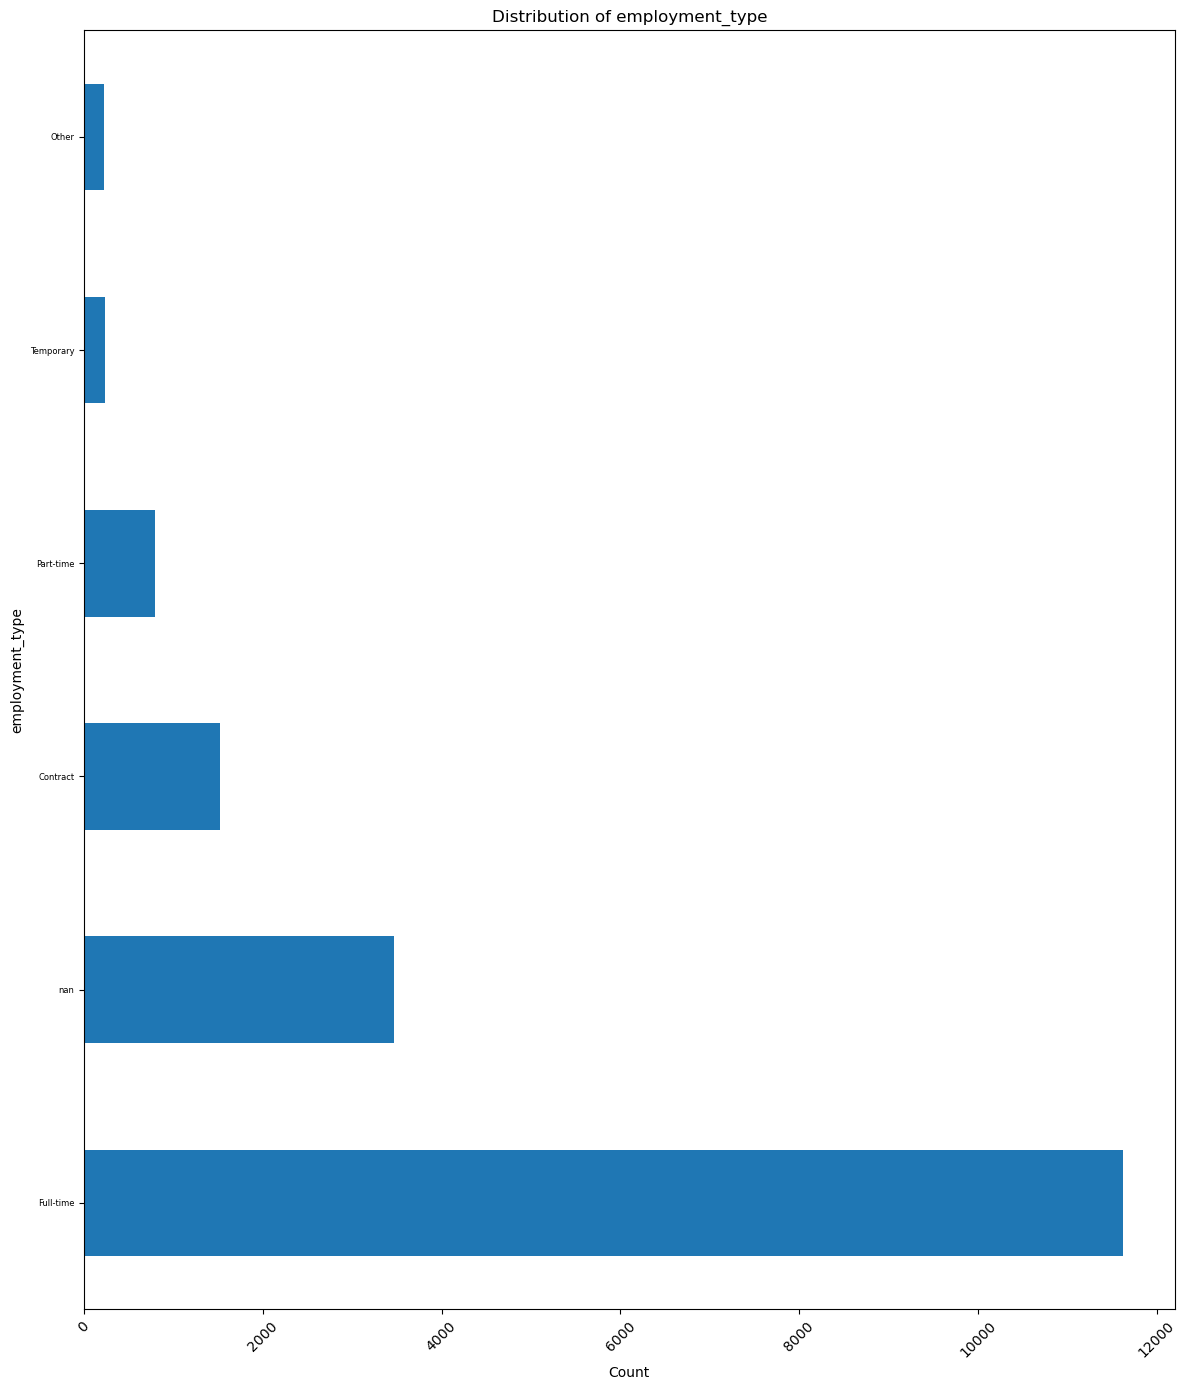

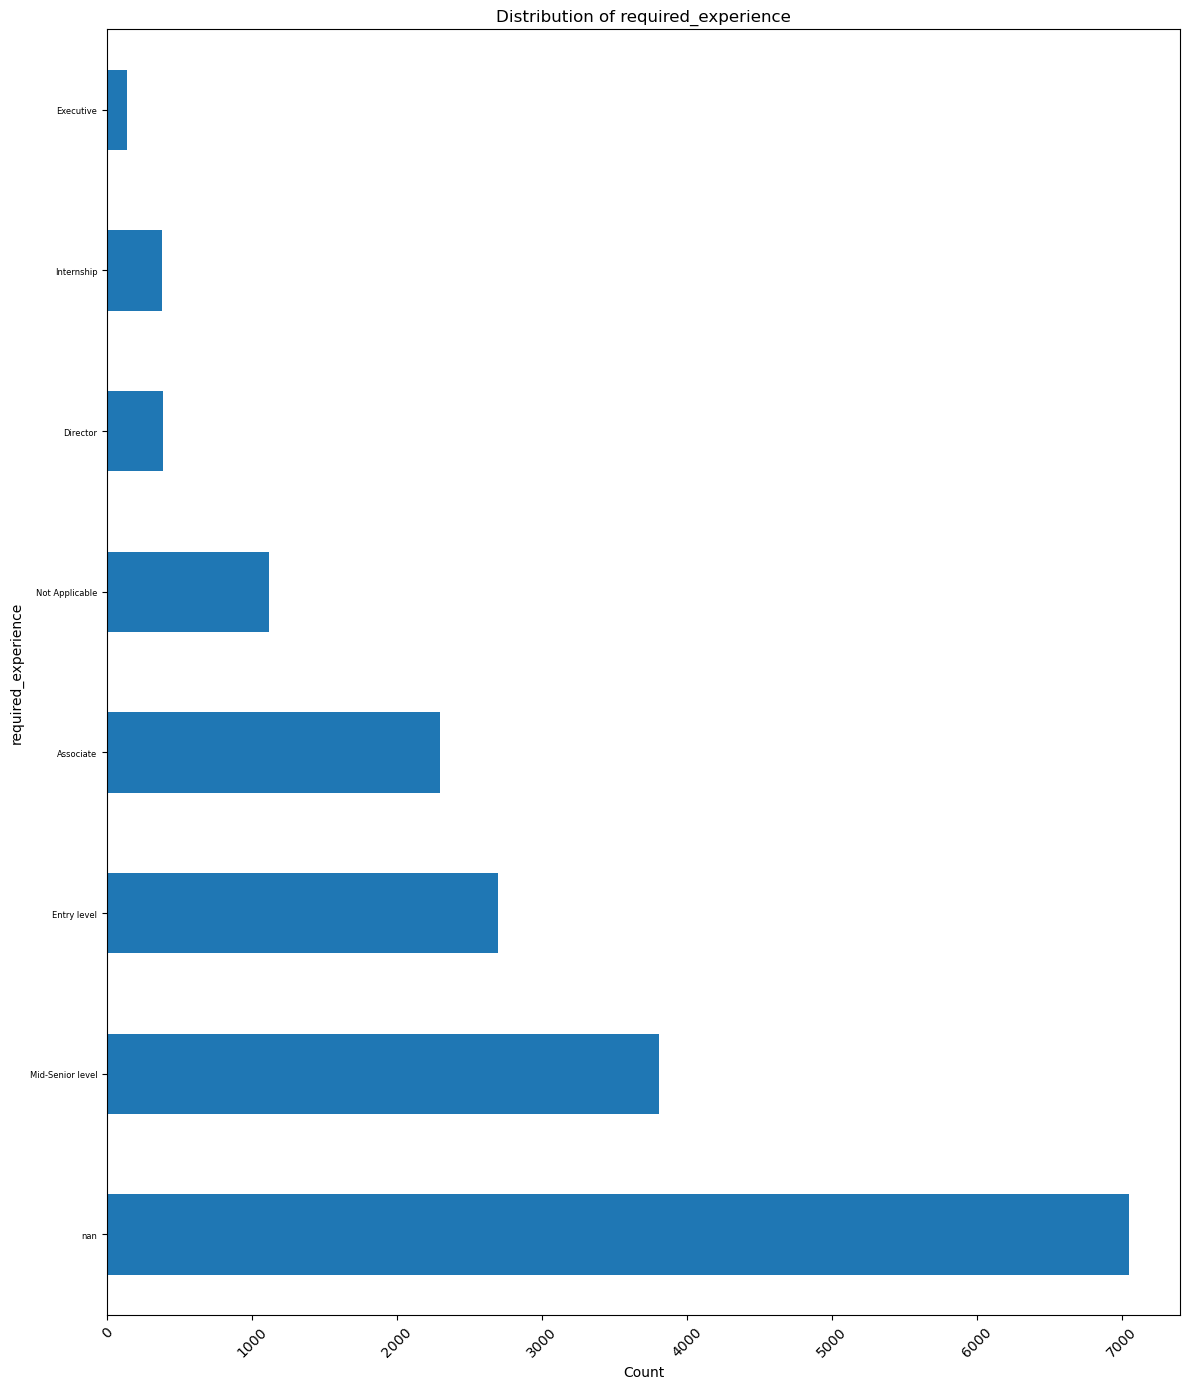

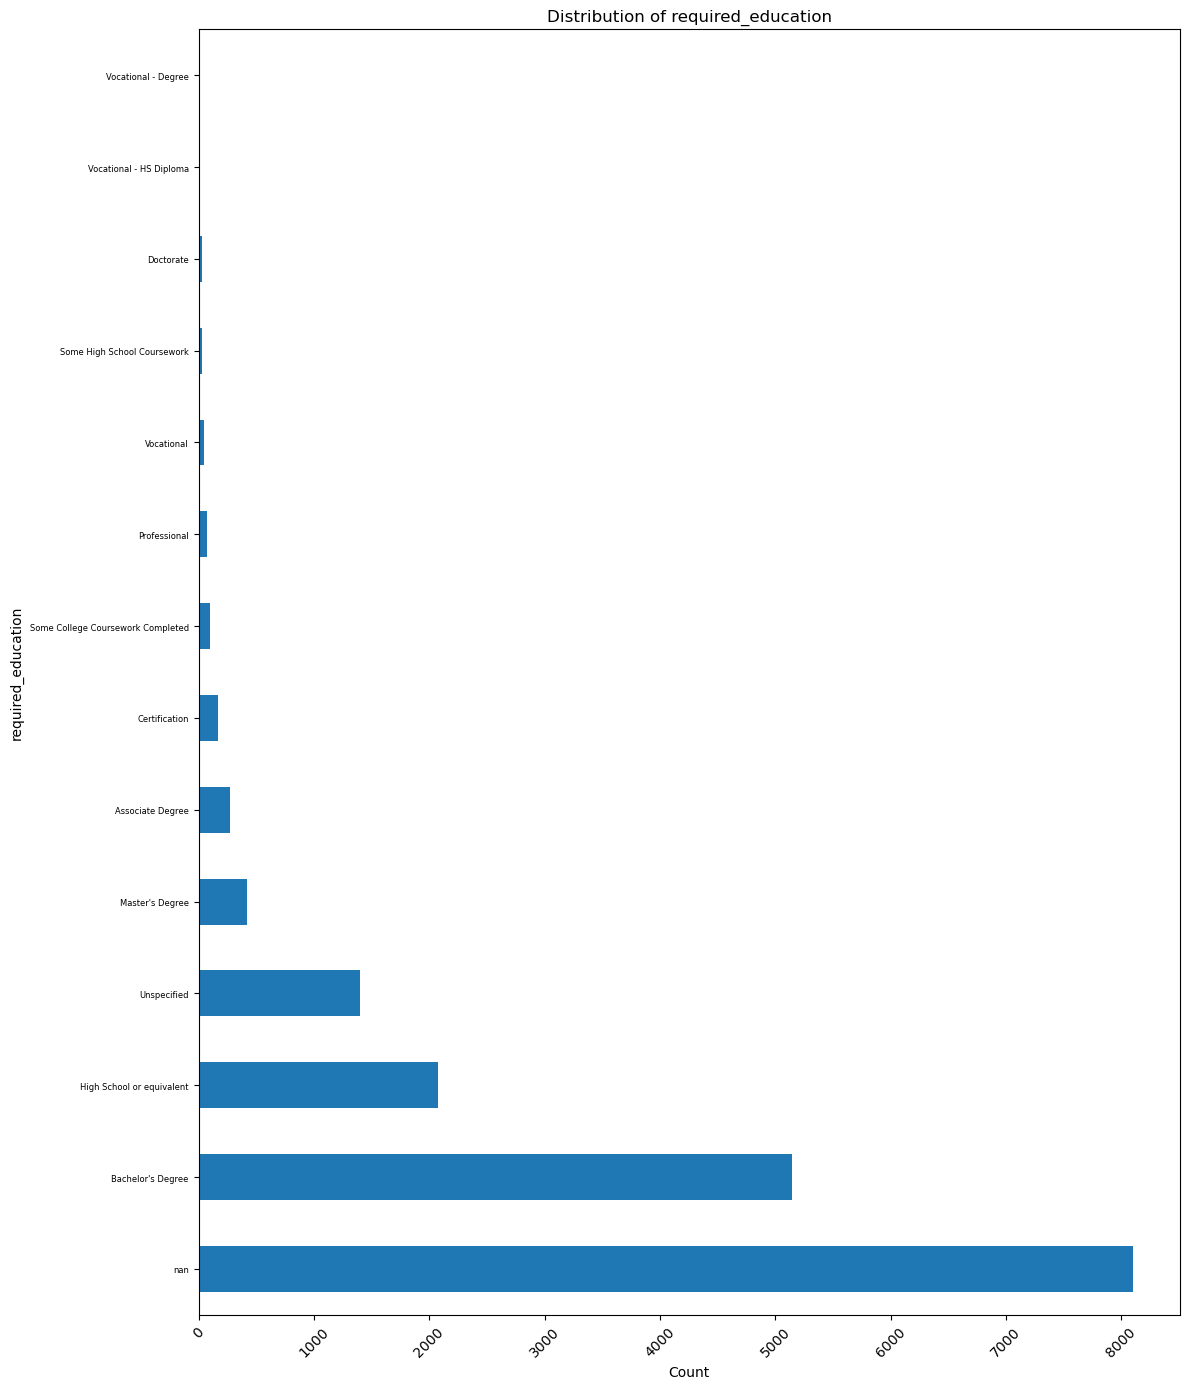

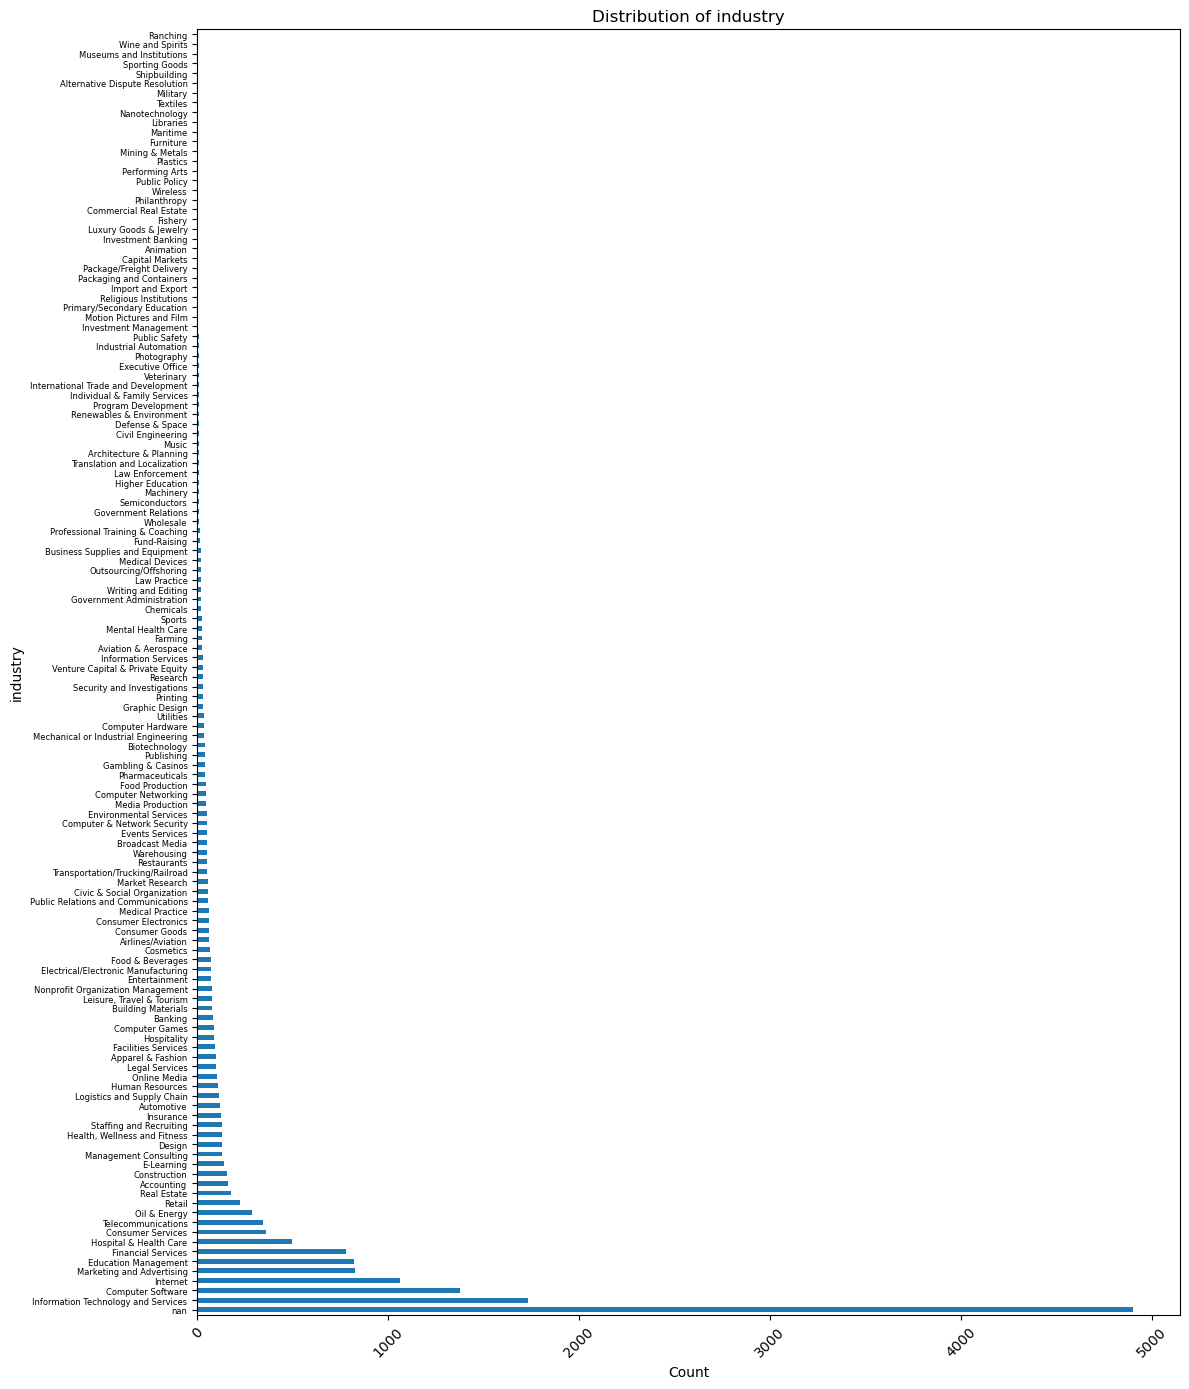

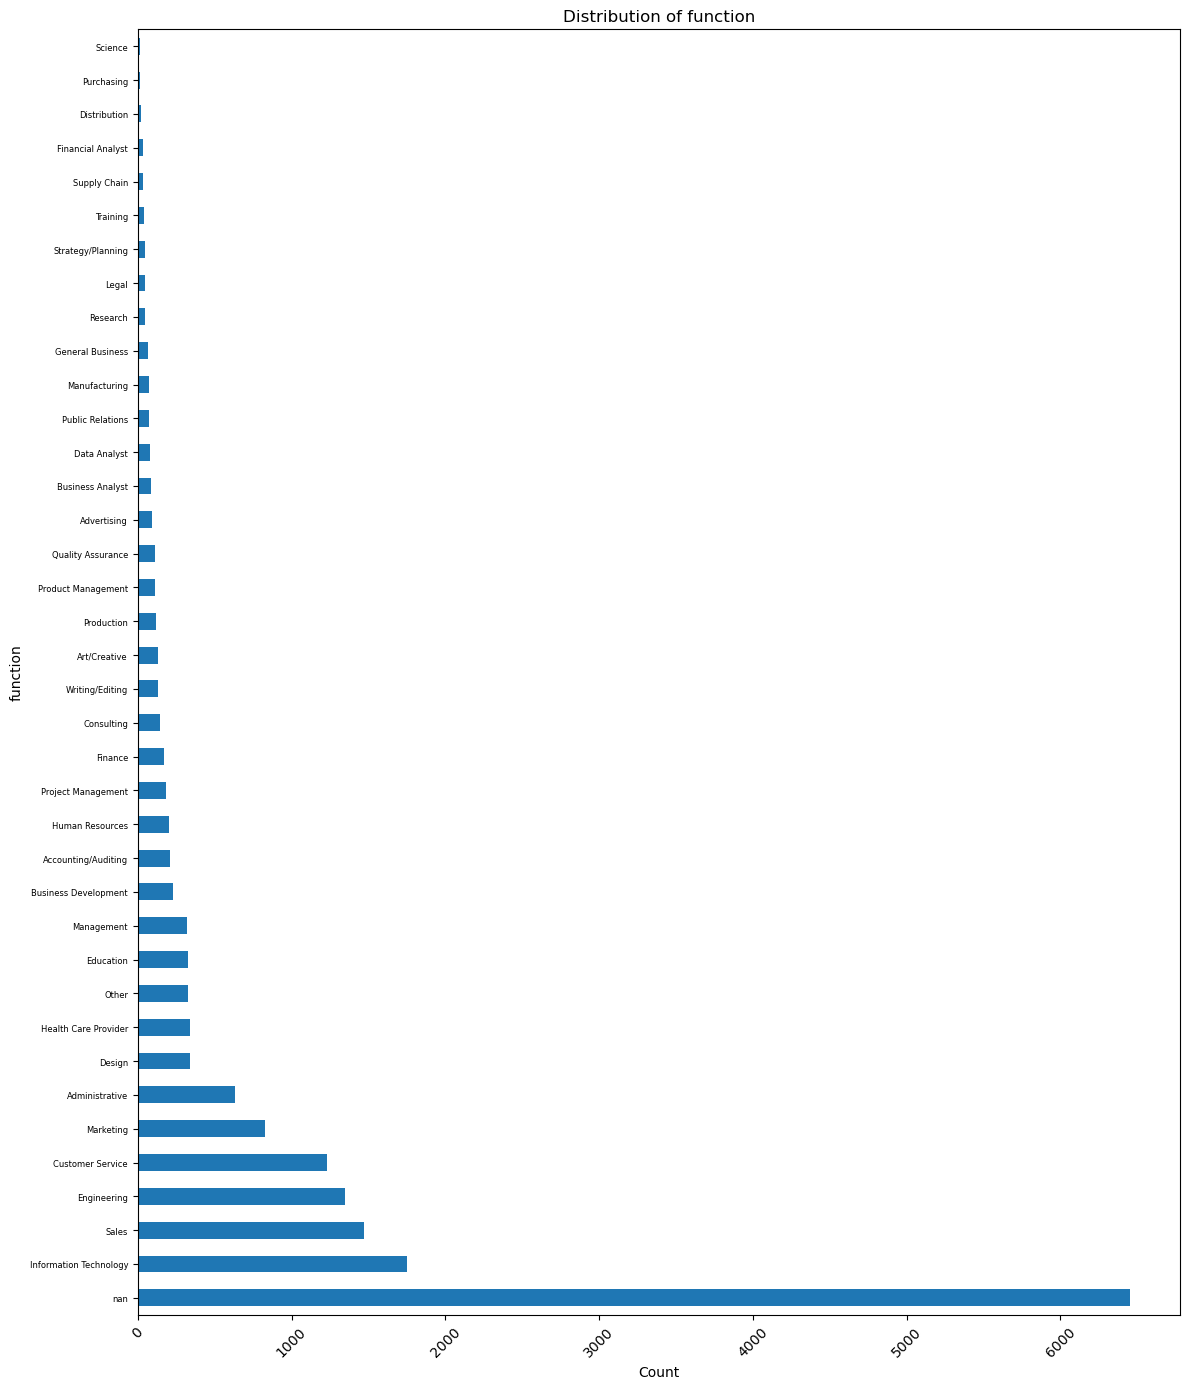

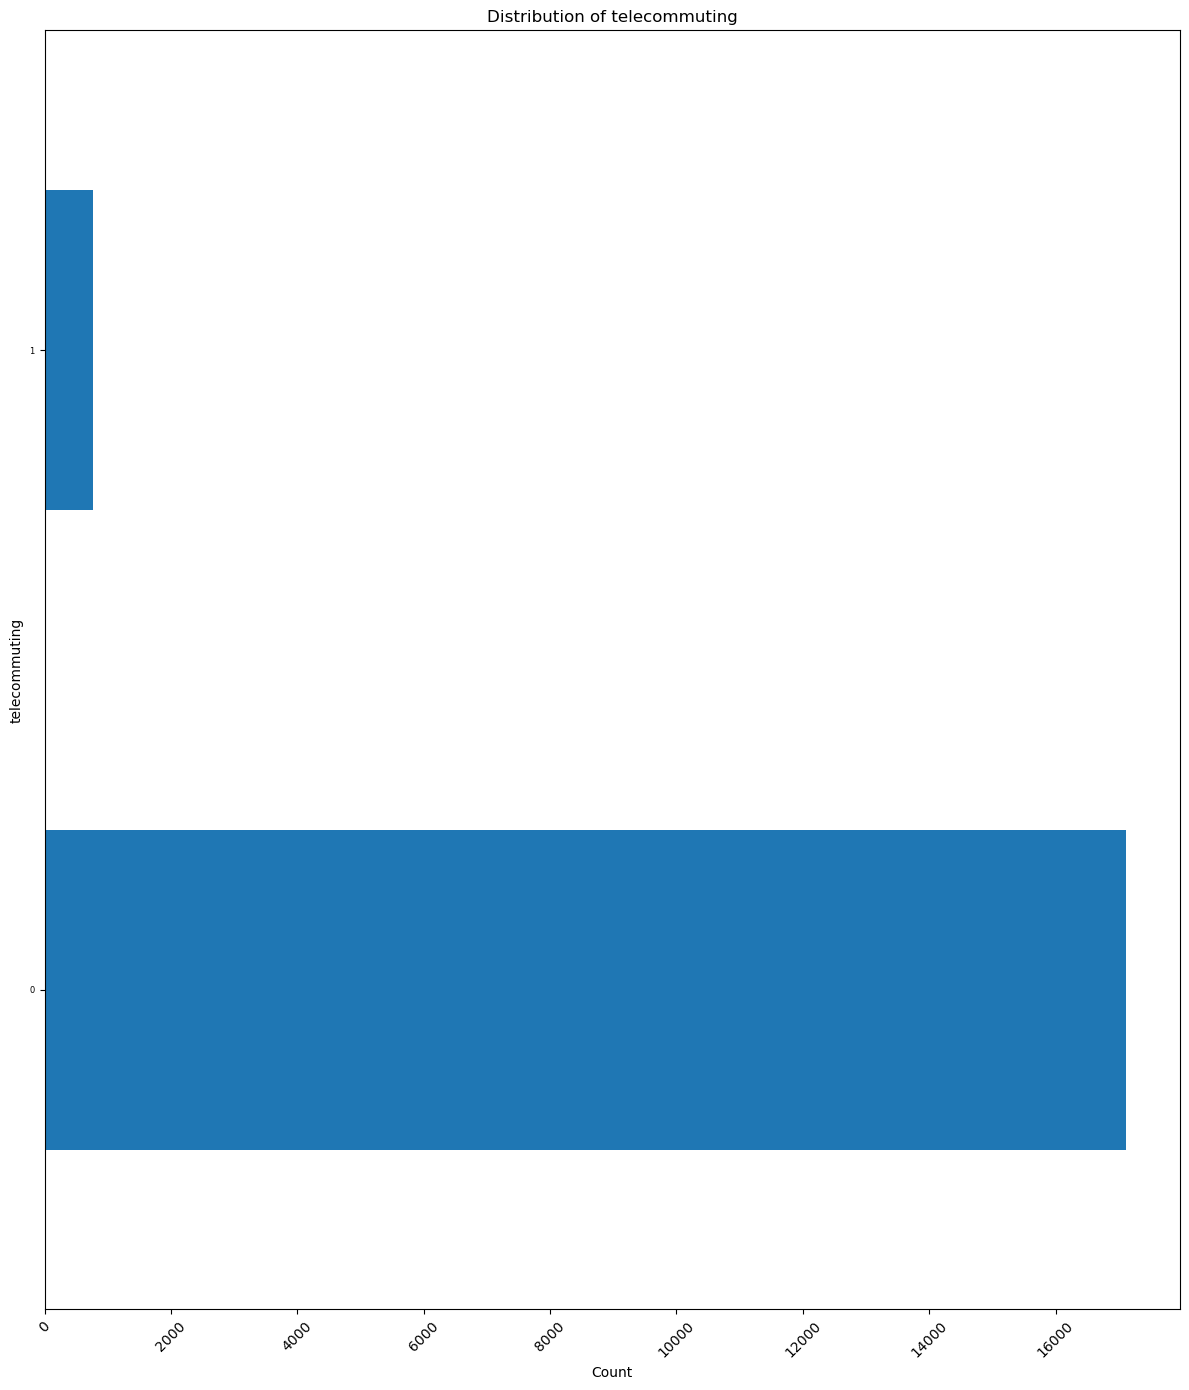

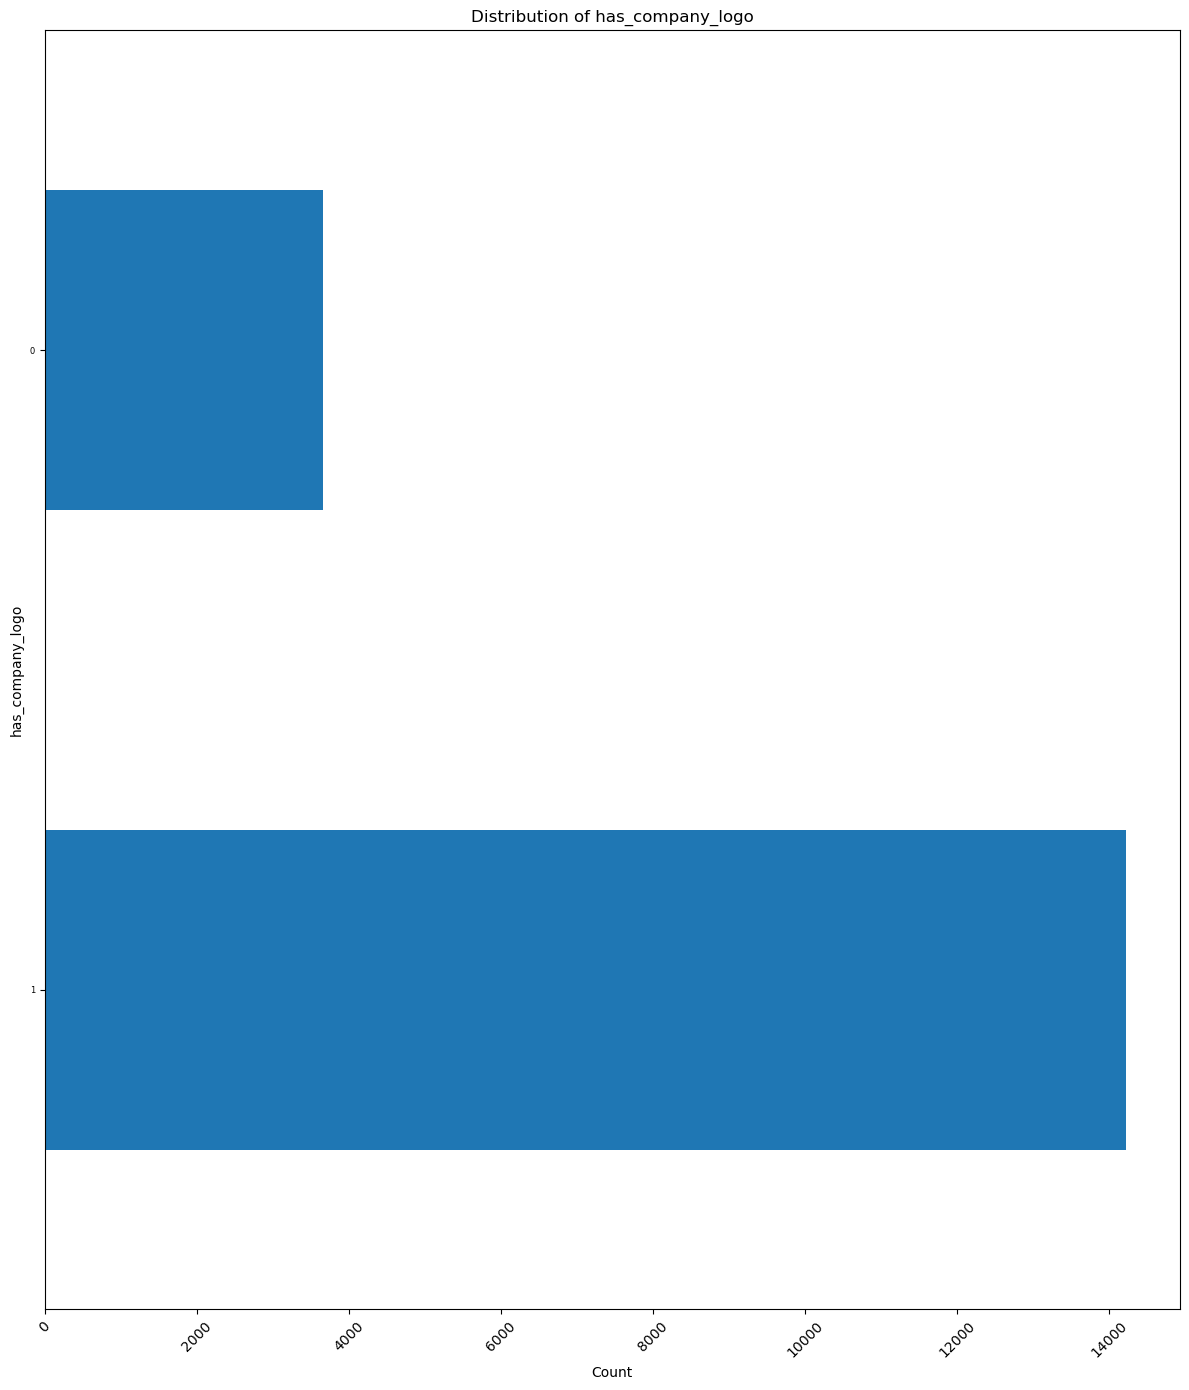

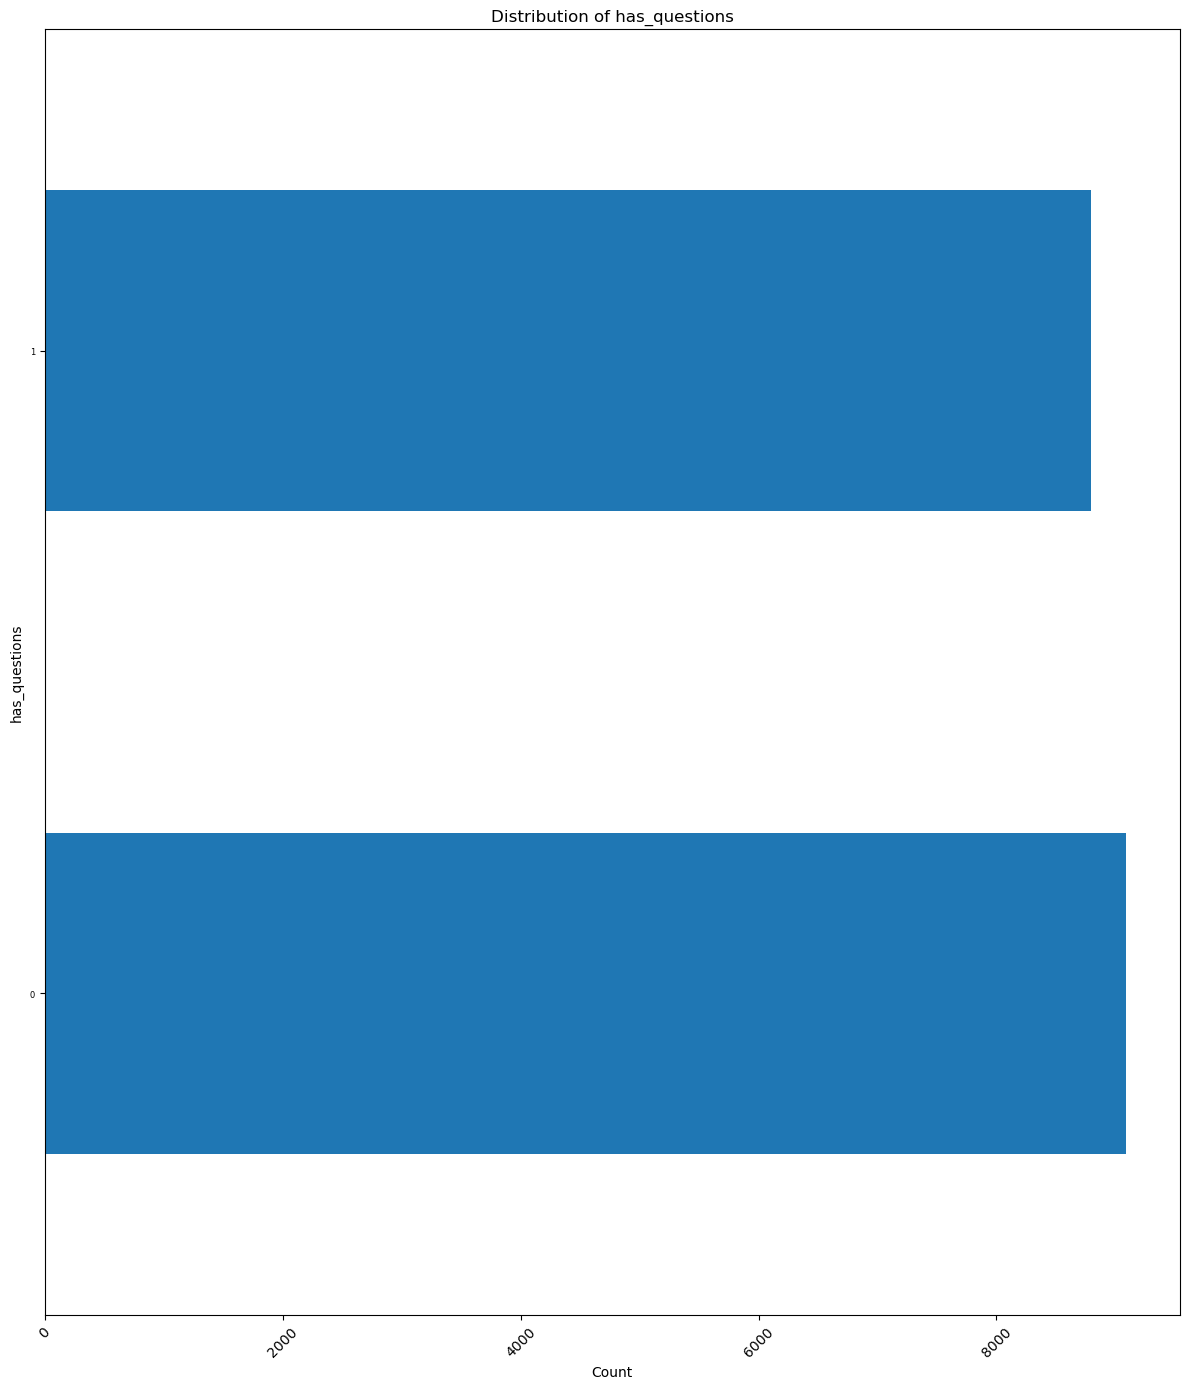

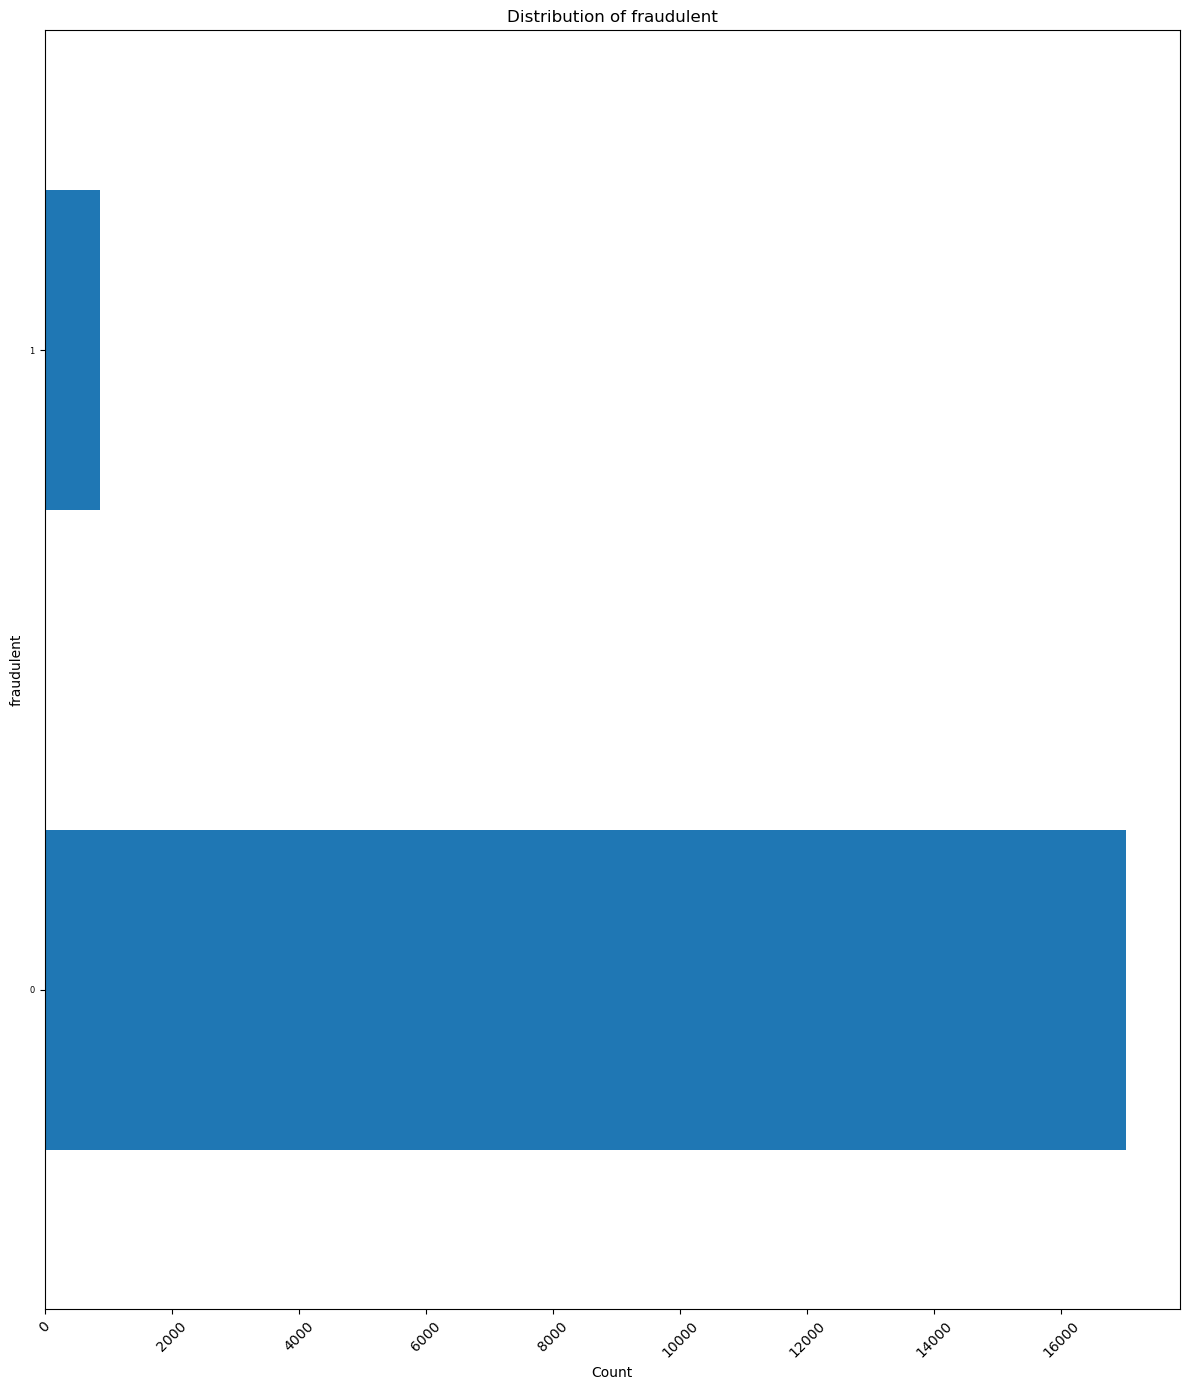

In [25]:
def plot_categorical_distributions(df: pd.DataFrame, columns: list):
    """
    Plot bar charts for categorical columns to show value distributions.

    Args:
        df (pd.DataFrame): The dataset.
        columns (list): List of categorical column names.
    """
    for col in columns:
        try:
            plt.figure(figsize=(12, 14))
            df[col].value_counts(dropna=False).plot(kind='barh')
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.yticks(fontsize=6)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            logging.error(f"Failed to plot distribution for {col}: {e}")

# Select categorical and binary columns to visualize
categorical_columns = [
    'employment_type', 'required_experience', 'required_education',
    'industry', 'function', 'telecommuting', 'has_company_logo',
    'has_questions', 'fraudulent'
]

# Plot value distributions
plot_categorical_distributions(df, categorical_columns)

# *Target Variable:*

Target Variable: fraudulent

Imbalanced classes:

0 (Real jobs) dominate the dataset.

1 (Fake jobs) are a minority.

We'll need to address this imbalance during modeling (e.g., SMOTE, stratified sampling).

# Correlation between numeric variables and detect potential outliers in these fields:

Correlation is a measure that shows the relationship between two variables. It ranges from -1 to +1:

Positive (+1) --> Strong positive correlation - as one goes up, the other also goes up.

Negative (-1) --> Strong negative correlation - as one goes up, the other goes down.

 None (0) --> No correlation - they don’t move together in any predictable way.

1. Field: has_company_logo

    - Correlation with fraudulent: negative

    - Meaning: If a job has a company logo (has_company_logo = 1), it's less likely to be fake

    - So: Fake jobs often don’t have logos → makes sense.

2. Field: has_questions

    - Correlation with fraudulent: positive

    - Meaning: If has_questions = 1 (i.e., the job does have screening questions), it's more likely to be fake

    - But this seems counterintuitive? You'd think real jobs use questions more?


3. Explanation?

The opposite is more likely true in most real-world cases:

Real jobs do include screening questions. Fake jobs tend to skip them, because they want to look easy/appealing. 

So, if has_questions has a positive correlation with fraudulent, it might be due to:

    3.1 - Noise or imbalance in the data.

    3.2 - Possible feature encoding error.

    3.3 - Or the correlation is very weak and not meaningful in practice.

Conclusion:

A positive correlation with fraudulent means that as the other variable increases (e.g., has_questions = 1), the likelihood of being fake (fraudulent = 1) also increases.

But correlation only shows association, not causation.

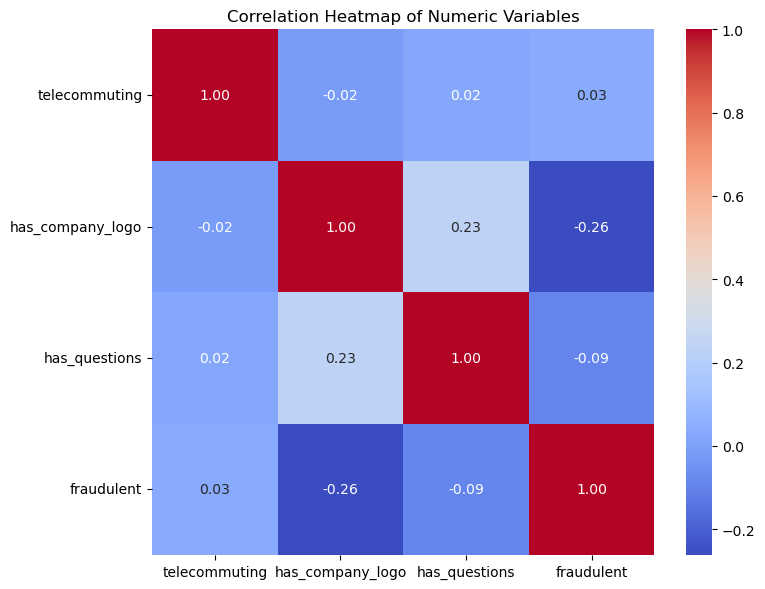

In [10]:
import seaborn as sns

def plot_correlation_heatmap(df: pd.DataFrame, numeric_cols: list):
    """
    Plot a heatmap showing correlation between numerical columns.

    Args:
        Pandas Dataframe (pd.DataFrame): The dataset.
        numeric_cols (list): List of numerical column names.
    """
    try:
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
        plt.title('Correlation Heatmap of Numeric Variables')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        logging.error(f"Error plotting correlation heatmap: {e}")
        raise

# Define numeric columns
numeric_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

# Plot correlation heatmap
plot_correlation_heatmap(df, numeric_columns)


# *EDA Conclusion and next Steps for Data-Science/ML Modeling:*

**1. Business Task: Detect Fake Job Postings**

**2. Best ML Task: Classification (Target = fraudulent)**

*These are categories, not continuous numbers (like predicting a salary). So we are solving a classification problem — specifically a binary classification (2 classes).*

**3. Class Imbalance Present in Dataset for Target Variable (fraudulent)? Yes, more real jobs (17,014) than fake jobs (866).**

This presents some challenges:
- Models tend to favor the majority class.
- Performance metrics like accuracy become misleading.
- The minority class (often the class of interest) gets poorly predicted.

Techniques like oversampling the minority class or undersampling the majority class can help address the problem during data preparation. Addressing class imbalance is crucial for developing reliable models that perform well across all classes, especially when minority classes represent important outcomes.

**4. Suggested Models:**

| Model | Why |
|-------|-----|
| **Logistic Regression** | Baseline, interpretable but underperforms on Class Imbalanced data |
| **Random Forest / XGBoost** | Handle missing data well, capture nonlinear interactions |
| **Naive Bayes** | Good with text + class imbalance. However, it assumes all features are independent (rarely true), it struggles with feature interactions, it's not great if you have mostly numeric features and complex relationships. |
| **NLP models (TF-IDF + Classifier)** | Useful if text fields like `description` or `requirements` are leveraged |

**5. Decision:**

*It seems like XGBoost with TF-IDF may work best for our needs.*

